In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


In [ ]:
games = pd.read_csv("games.csv")
teams = pd.read_csv("teams.csv")

In [ ]:
mem_games = games[games.TEAM_ID_away == 1610612763]
nyk_games = games[games.HOME_TEAM_ID ==1610612752]
mem_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
35,2021-11-13,22100188,Final,1610612740,1610612763,2021,1610612740,112.0,0.481,0.880,0.483,29.0,37.0,1610612763,101.0,0.432,0.810,0.333,21.0,39.0,1
93,2021-11-05,22100126,Final,1610612764,1610612763,2021,1610612764,115.0,0.583,0.538,0.400,34.0,53.0,1610612763,87.0,0.354,0.765,0.194,19.0,39.0,1
158,2021-10-28,22100070,Final,1610612744,1610612763,2021,1610612744,101.0,0.433,0.750,0.350,29.0,48.0,1610612763,104.0,0.402,1.000,0.250,25.0,51.0,0
167,2021-10-27,22100063,Final,1610612757,1610612763,2021,1610612757,116.0,0.464,0.742,0.417,22.0,48.0,1610612763,96.0,0.365,0.474,0.340,27.0,50.0,1
188,2021-10-24,22100040,Final,1610612747,1610612763,2021,1610612747,121.0,0.536,0.682,0.533,29.0,36.0,1610612763,118.0,0.450,0.833,0.371,25.0,49.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24891,2014-10-31,21400021,Final,1610612754,1610612763,2014,1610612754,89.0,0.459,0.813,0.381,19.0,46.0,1610612763,97.0,0.443,0.741,0.368,20.0,40.0,0
24948,2014-10-20,11400090,Final,1610612742,1610612763,2014,1610612742,108.0,0.483,0.778,0.357,29.0,49.0,1610612763,103.0,0.432,0.700,0.238,14.0,43.0,1
24981,2014-10-14,11400051,Final,1610612760,1610612763,2014,1610612760,117.0,0.533,0.939,0.286,22.0,33.0,1610612763,107.0,0.506,0.680,0.400,19.0,33.0,1
25003,2014-10-09,11400023,Final,1610612745,1610612763,2014,1610612745,113.0,0.420,0.795,0.467,21.0,50.0,1610612763,93.0,0.392,0.730,0.308,21.0,36.0,1


Text(0.5, 1.0, 'Memphis Opponent Points')

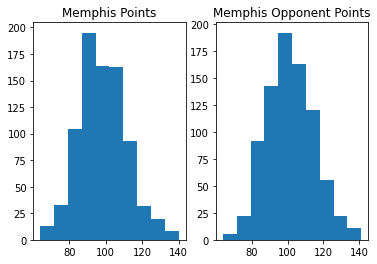

In [ ]:
plt.subplot(1,2,1)
plt.hist(mem_games['PTS_away'])
plt.title('Memphis(A) Points')
plt.subplot(1,2,2)
plt.hist(mem_games['PTS_home'])
plt.title('Memphis Opponent (H) Points')

Text(0.5, 1.0, 'New York Opponent (A) Points')

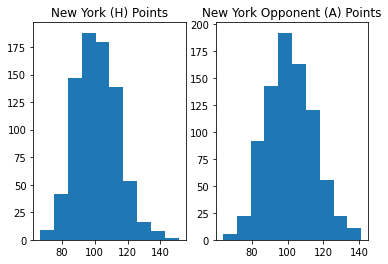

In [ ]:
plt.subplot(1,2,1)
plt.hist(nyk_games['PTS_home'])
plt.title('New York (H) Points')
plt.subplot(1,2,2)
plt.hist(mem_games['PTS_home'])
plt.title('New York Opponent (A) Points')

In [ ]:
mem_mean = mem_games['PTS_away'].mean()
mem_std = mem_games['PTS_away'].std()
memopp_mean = mem_games['PTS_home'].mean()
memopp_std = mem_games['PTS_home'].std()
print("Memphis mean points: ", mem_mean)
print("Memphis points STD: ", mem_std)
print("Memphis opposing mean points: ", memopp_mean)
print("Memphis opposing points STD: ", memopp_std)

Memphis mean points:  98.0969696969697
Memphis points STD:  12.91008122037962
Memphis opposing mean points:  101.32
Memphis opposing points STD:  13.078901708588253


In [ ]:
nyk_mean = nyk_games['PTS_home'].mean()
nyk_std = nyk_games['PTS_home'].std()
nykopp_mean = nyk_games['PTS_away'].mean()
nykopp_std = nyk_games['PTS_away'].std()
print("New York mean points: ", nyk_mean)
print("New York points STD: ", nyk_std)
print("New York opposing mean points: ", nykopp_mean)
print("New York opposing points STD: ", nykopp_std)

New York mean points:  101.49744897959184
New York points STD:  12.53684199777149
New York opposing mean points:  101.99872448979592
New York opposing points STD:  12.91573034423601


In [ ]:
rnd.gauss(mem_mean, mem_std)

104.25642695067893

In [ ]:
def simGame():
  memScore = round((rnd.gauss(mem_mean, mem_std) + rnd.gauss(nykopp_mean, nykopp_std))/2)
  nykScore = round((rnd.gauss(nyk_mean, nyk_std) + rnd.gauss(memopp_mean, memopp_std))/2)
  #print("Memphis: ", memScore, "New York: ", nykScore)
  if memScore > nykScore:
    return 1, memScore, nykScore
  elif memScore < nykScore:
    return -1, memScore, nykScore
  else:
    return 0, memScore, nykScore

In [ ]:
simGame()

(1, 97, 92)

In [ ]:
def simMultiple(games):
  results = []
  memScores = []
  nykScores = []
  team1win = 0
  team2win = 0
  tie = 0
  for i in range(games):
    gms = simGame()
    results.append(gms[0])
    if gms[0] == 1:
      team1win += 1
    elif gms[0] == -1:
      team2win += 1
    else:
      tie += 1
    memScores.append(gms[1])
    nykScores.append(gms[2])
    
  print("Memphis win ", team1win/games)
  print("New York win ", team2win/games)
  print("Tie", tie/games)
  return(memScores, nykScores)


In [ ]:
totals = simMultiple(100000)
pd.DataFrame(totals[0]).hist()
plt.title("MEM average " + str(np.mean(totals[0])))
pd.DataFrame(totals[1]).hist()
plt.title("NYK average " +  str(np.mean(totals[1])))

Memphis win  0.44182
New York win  0.52721
Tie 0.03097
